In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_03_ama/dados/kc2.csv'

In [160]:
# Bibliotecas

# tratamento de dados
import pandas as pd
import numpy as np

# Tratamento de dados para separar treino, teste e normalização
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Bibliotecas
from sklearn import tree

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Accent")
sns.set_style("darkgrid")
import plotly.express as px
import plotly.graph_objects as g

# definindo uma semente goblal
np.random.seed(42)

In [161]:
df = pd.read_csv(link, header=None)

In [162]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,0.0
1,39.0,4.0,1.0,2.0,105.0,520.19,0.07,13.89,37.44,7227.91,...,29.0,1.0,4.0,2.0,12.0,19.0,61.0,44.0,7.0,0.0
2,1.0,1.0,1.0,1.0,6.0,15.51,0.40,2.50,6.20,38.77,...,0.0,0.0,0.0,0.0,5.0,1.0,5.0,1.0,1.0,0.0
3,15.0,1.0,1.0,1.0,55.0,224.81,0.17,5.73,39.25,1287.55,...,12.0,0.0,1.0,0.0,6.0,11.0,34.0,21.0,1.0,0.0
4,12.0,2.0,1.0,2.0,15.0,45.00,0.17,6.00,7.50,270.00,...,8.0,1.0,0.0,0.0,6.0,2.0,11.0,4.0,3.0,0.0


In [163]:
# Definindo o dados de entrada e dados de saída.
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

##**Normalizando os Dados**

In [164]:
# Normalizando os dados
scaler = MinMaxScaler()
X_normalizando = scaler.fit_transform(X)

In [165]:
# nome da colunas de entrada para poder colocar no gráfico.
colunas = [
    'loc_numérico_da_contagem_de_linhas_de_código_de_McCabe',
    'v_g_numérico_McCabe_complexidade_ciclomática',
    'ev_g_numérico_McCabe_complexidade_essencial',
    'iv_g_numérico_McCabe_complexidade_do_design',
    'n_numérica_de_operadores_totais_de_Halstead_operandos',
    'v_numérico_Halstead_volume',
    'l_numérico_Halstead_duração_do_programa',
    'd_numérico_de_dificuldade_Halstead',
    'i_numérico_Halstead_inteligência',
    'e_numérico_de_esforço_de_Halstead',
    'b_numérico_Halstead',
    't_numérico_do_estimador_de_tempo_de_Halstead',
    'loCode_numérico_da_contagem_de_linhas_de_Halstead',
    'lOComment_numérico_da_contagem_de_linhas_de_comentários_de_Halstead',
    'lOBlank_numérico_da_contagem_de_linhas_em_branco_de_Halstead',
    'loCodeAndComment_numérico',
    'uniq_Op_numérico_de_operadores_exclusivos',
    'uniq_Opnd_numérico_de_operandos_únicos',
    'total_Op_numérico_total_de_operadores',
    'total_Opnd_numérico_total_de_operandos',
    'branchCount_numérica_do_gráfico_de_fluxo'
]

# **Funções:**

aqui contém funções:                
- calcular desvio padrão            
- calcular a média                   
- calcular devio padrão e média por classes                  

**Class de métricas**               
contém os seguintes métodos:    
- Acurácia                 
- Precisão               
- f1_score                 
- recall  
- especificidade
- formatação das métricas

**Funções de Gráficos:**
- Gráfico de rosca para métricas
- Gráfico para matriz de confusão


In [166]:
#____________________________________________________________________________________________________________________________
def calcular_desvio_padrao(x):
    desvios = np.sqrt(np.mean((x - np.mean(x, axis=0))**2, axis=0))
    return desvios

#____________________________________________________________________________________________________________________________

def calcular_media(x):
  media = np.mean(x, axis=0)
  return media

#____________________________________________________________________________________________________________________________

# Esta função tem como objetivo de calcular ao desvio padrão e a média de cada classe a partir da acurácia

def desvio_padrao_media_por_classe(scores_treino, scores_teste):

  # Calculando a média das pontuações de validação
  mean_score_treino = calcular_media(scores_treino)
  desvio_score_treino = calcular_desvio_padrao(scores_treino)

  print(f"Acurácia dos 10 folds de teste: ",[f'{score * 100:.2f}%' for score in scores_treino])
  print(f"Média global da Acurácia de validação dos dados de teste: {mean_score_treino * 100:.2f}%")
  print(f"Desvio Padrão global da Acurácia de validação dos dados de teste: {desvio_score_treino * 100:.2f}%")

  print('-'*50)
  grafico_rosca('Média Acuracia',mean_score_treino)

In [167]:
# Funções de métricas
class Metricas:

  def __init__(self,real,previsto):

     self.real = real
     self.previsto = previsto

     # Total
     self._total = len(self.real)

     # Verdadeiros Positivos (VP): São as instâncias que são positivas e que o modelo classificou corretamente como positivas.
     self._VP = np.sum((self.real == 1) & (self.previsto == 1))
     # Verdadeiros Negativos (VN): São as instâncias que são negativas e que o modelo classificou corretamente como negativas.
     self._VN = np.sum((self.real == 0) & (self.previsto == 0))
    # Falsos Positivos (FP): São as instâncias que são negativas, mas que o modelo classificou erroneamente como positivas.
     self._FP = np.sum((self.real == 0) & (self.previsto == 1))
    # Falsos Negativos (FN): São as instâncias que são positivas, mas que o modelo classificou erroneamente como negativas.
     self._FN = np.sum((self.real == 1) & (self.previsto == 0))

  def acuracia(self):
     acuracia = (self._VP + self._VN) / (self._VP + self._VN + self._FP + self._FN)
     return acuracia

  def precisao(self):
    precision = self._VP / (self._VP + self._FP)
    return precision

  def recall(self):
    recall = self._VP / (self._VP + self._FN)
    return recall

  def especificidade(self):
    taxa = self._VN / (self._VN + self._FP)
    return taxa

  def f1_score(self):
    score = 2 * ((self.precisao() * self.recall()) / (self.precisao() + self.recall()))
    return score

  def formatacao(self):
    print(f"Acuracia: {self.acuracia() * 100:.2f}%\
    \n especificidade: {self.especificidade() * 100:.2f}%\
    \n recall: {self.recall() * 100:.2f}%\
    \n precisao: {self.precisao() * 100:.2f}%\
    \n f1_score: {self.f1_score() * 100:.2f}%")


  @property
  def VP(self):
        # Este código é executado quando alguém for ler o valor de self.nome
        return self._VP
  @property
  def VN(self):
        return self._VN
  @property
  def FP(self):
        return self._FP
  @property
  def FN(self):
        return self._FN

In [168]:
print('Acuracia: 1 recall: 3')

Acuracia: 1 recall: 3


In [169]:
# Gráfico de rosca para métricas

import random


def grafico_rosca(nome_metrica,valor_da_metrica):

  def cor_rgb_aleatoria():
    """Gera uma cor RGB aleatória no formato 'rgb(r, g, b)'."""
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return f'rgb({r},{g},{b})'

  cor_aleatoria = cor_rgb_aleatoria()

  # Valor da acurácia
  valor = valor_da_metrica * 100


  # Calcule o tamanho da "rosca"
  rosca_size = 100 - valor

  # Crie um DataFrame com os dados
  data = {'Categoria': [f'{nome_metrica}', ''],
          'Valor': [valor, rosca_size]}
  df = pd.DataFrame(data)

  # Crie o gráfico de pizza com Plotly Express
  fig = px.pie(df, values='Valor',
              names='Categoria',
              hole=0.7,
              color_discrete_sequence=[f'{cor_aleatoria}', 'lightgray'])


  fig.update_traces(textinfo='none',
                    showlegend=False,
                    #marker=dict(line=dict(color='cor', width=2))
                    )

  fig.update_layout(#title='Acurácia',
                    width=550,
                    height=350,
                    )

  fig.add_annotation(x=0.5, y=1.15, text=f'<b>{nome_metrica}</b>', font=dict(color = cor_aleatoria, size=29, family='Arial, sans-serif'), showarrow=False)
  # Adicione o valor da acurácia no centro
  fig.add_annotation(x=0.5, y=0.5, text=f'<b>{valor:.2f}%</b>',font=dict(color= cor_aleatoria, size=32, family='Arial, sans-serif'),  showarrow=False)

  return fig.show()

***Escolha:***             
criterio:   
- grid     
- entropy  


Arvore de decisão

In [170]:
# Usando distância Euclidiana k = 1

from sklearn.model_selection import KFold
# Lista para armazenar as pontuações de validação de cada fold
scores_treino = []
scores_teste = []

salvando_y_previsto_de_cada_fold = []


# Definindo a validação cruzada com 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state = 42)

# Preparando o modelo
arvore_decisao = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4)



# Loop sobre os folds
for fold_idx, (treino_index, teste_index) in enumerate(kf.split(X_normalizando), start=1):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = np.array(y[treino_index]), np.array(y[teste_index])

    arvore = arvore_decisao.fit(X_treino, y_treino)

    y_previsto = arvore.predict(X_teste)

    # Avaliando o modelo
    metrics = Metricas(y_teste, y_previsto)
    score = metrics.acuracia()
    scores_treino.append(score)

    print(f'\nFold {fold_idx}:')
    metrics.formatacao()

display('Resultados usando o critério gini')
desvio_padrao_media_por_classe(scores_treino, scores_teste)


Fold 1:
Acuracia: 72.73%    
 especificidade: 66.67%    
 recall: 76.92%    
 precisao: 76.92%    
 f1_score: 76.92%

Fold 2:
Acuracia: 68.18%    
 especificidade: 66.67%    
 recall: 70.00%    
 precisao: 63.64%    
 f1_score: 66.67%

Fold 3:
Acuracia: 81.82%    
 especificidade: 90.00%    
 recall: 75.00%    
 precisao: 90.00%    
 f1_score: 81.82%

Fold 4:
Acuracia: 86.36%    
 especificidade: 84.62%    
 recall: 88.89%    
 precisao: 80.00%    
 f1_score: 84.21%

Fold 5:
Acuracia: 80.95%    
 especificidade: 83.33%    
 recall: 77.78%    
 precisao: 77.78%    
 f1_score: 77.78%

Fold 6:
Acuracia: 85.71%    
 especificidade: 71.43%    
 recall: 92.86%    
 precisao: 86.67%    
 f1_score: 89.66%

Fold 7:
Acuracia: 71.43%    
 especificidade: 63.64%    
 recall: 80.00%    
 precisao: 66.67%    
 f1_score: 72.73%

Fold 8:
Acuracia: 80.95%    
 especificidade: 91.67%    
 recall: 66.67%    
 precisao: 85.71%    
 f1_score: 75.00%

Fold 9:
Acuracia: 71.43%    
 especificidade: 88.89%   

'Resultados usando o critério gini'

Acurácia dos 10 folds de teste:  ['72.73%', '68.18%', '81.82%', '86.36%', '80.95%', '85.71%', '71.43%', '80.95%', '71.43%', '76.19%']
Média global da Acurácia de validação dos dados de teste: 77.58%
Desvio Padrão global da Acurácia de validação dos dados de teste: 6.11%
--------------------------------------------------


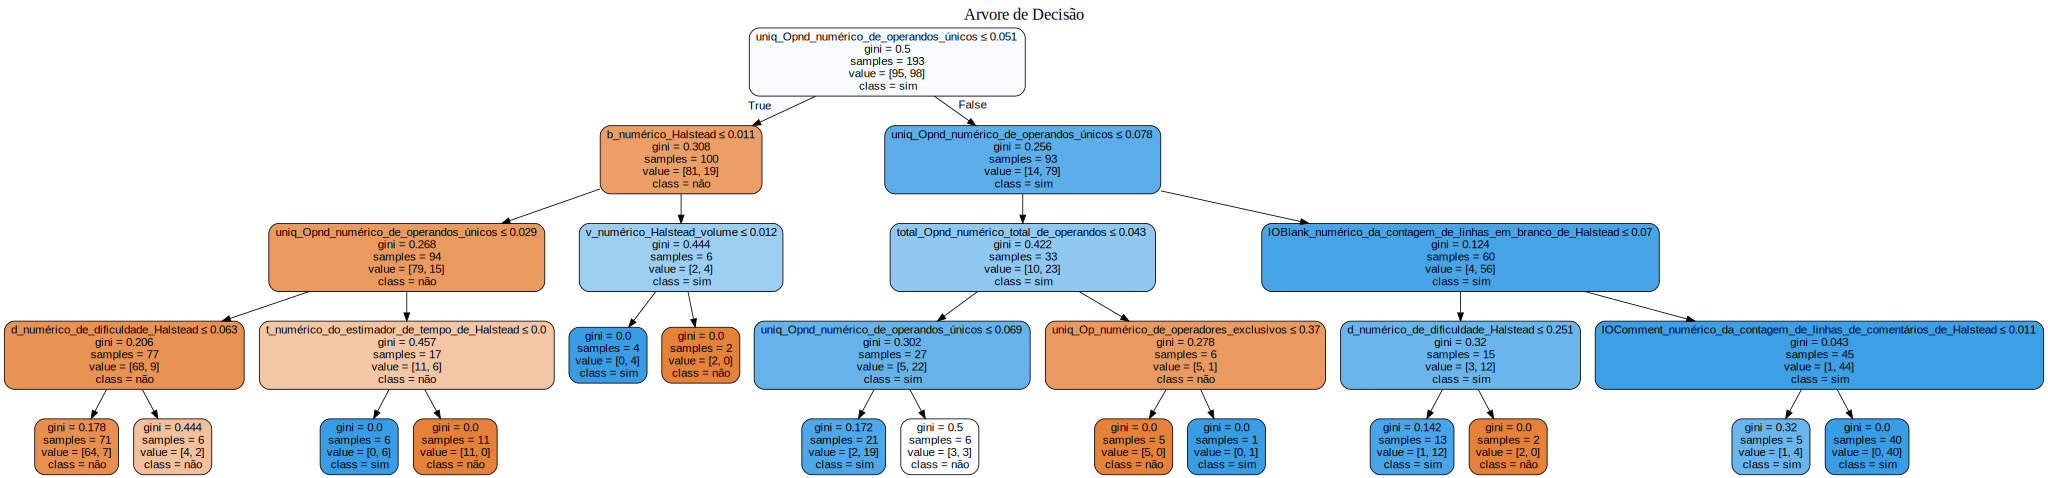

In [171]:
# out_file=None significa que não vai ser salvo em lugar nenhum

dot_data = export_graphviz(
    arvore,
    out_file=None,
    feature_names=colunas,
    filled=True,
    rounded=True,
    class_names=['não', 'sim'],
    special_characters=True
)

# Customize the DOT data to add a title and improve aesthetics
dot_data = dot_data.replace(
    'digraph Tree {',
    'digraph Tree {\nlabel="Arvore de Decisão"\nlabelloc="t"\nfontsize=20'
)



grafico = graphviz.Source(dot_data)
grafico

In [172]:
# Preparando o modelo
arvore_decisao_entropia = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Loop sobre os folds
for fold_idx, (treino_index, teste_index) in enumerate(kf.split(X_normalizando), start=1):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = np.array(y[treino_index]), np.array(y[teste_index])

    arvore = arvore_decisao_entropia.fit(X_treino, y_treino)

    y_previsto = arvore.predict(X_teste)

    # Avaliando o modelo
    metrics = Metricas(y_teste, y_previsto)
    score = metrics.acuracia()
    scores_treino.append(score)

    print(f'\nFold {fold_idx}:')
    metrics.formatacao()

display('Resultados usando o critério entropy')
desvio_padrao_media_por_classe(scores_treino, scores_teste)


Fold 1:
Acuracia: 63.64%    
 especificidade: 77.78%    
 recall: 53.85%    
 precisao: 77.78%    
 f1_score: 63.64%

Fold 2:
Acuracia: 63.64%    
 especificidade: 58.33%    
 recall: 70.00%    
 precisao: 58.33%    
 f1_score: 63.64%

Fold 3:
Acuracia: 95.45%    
 especificidade: 90.00%    
 recall: 100.00%    
 precisao: 92.31%    
 f1_score: 96.00%

Fold 4:
Acuracia: 77.27%    
 especificidade: 84.62%    
 recall: 66.67%    
 precisao: 75.00%    
 f1_score: 70.59%

Fold 5:
Acuracia: 80.95%    
 especificidade: 83.33%    
 recall: 77.78%    
 precisao: 77.78%    
 f1_score: 77.78%

Fold 6:
Acuracia: 71.43%    
 especificidade: 71.43%    
 recall: 71.43%    
 precisao: 83.33%    
 f1_score: 76.92%

Fold 7:
Acuracia: 85.71%    
 especificidade: 81.82%    
 recall: 90.00%    
 precisao: 81.82%    
 f1_score: 85.71%

Fold 8:
Acuracia: 85.71%    
 especificidade: 91.67%    
 recall: 77.78%    
 precisao: 87.50%    
 f1_score: 82.35%

Fold 9:
Acuracia: 71.43%    
 especificidade: 88.89%  

'Resultados usando o critério entropy'

Acurácia dos 10 folds de teste:  ['72.73%', '68.18%', '81.82%', '86.36%', '80.95%', '85.71%', '71.43%', '80.95%', '71.43%', '76.19%', '63.64%', '63.64%', '95.45%', '77.27%', '80.95%', '71.43%', '85.71%', '85.71%', '71.43%', '76.19%']
Média global da Acurácia de validação dos dados de teste: 77.36%
Desvio Padrão global da Acurácia de validação dos dados de teste: 8.07%
--------------------------------------------------


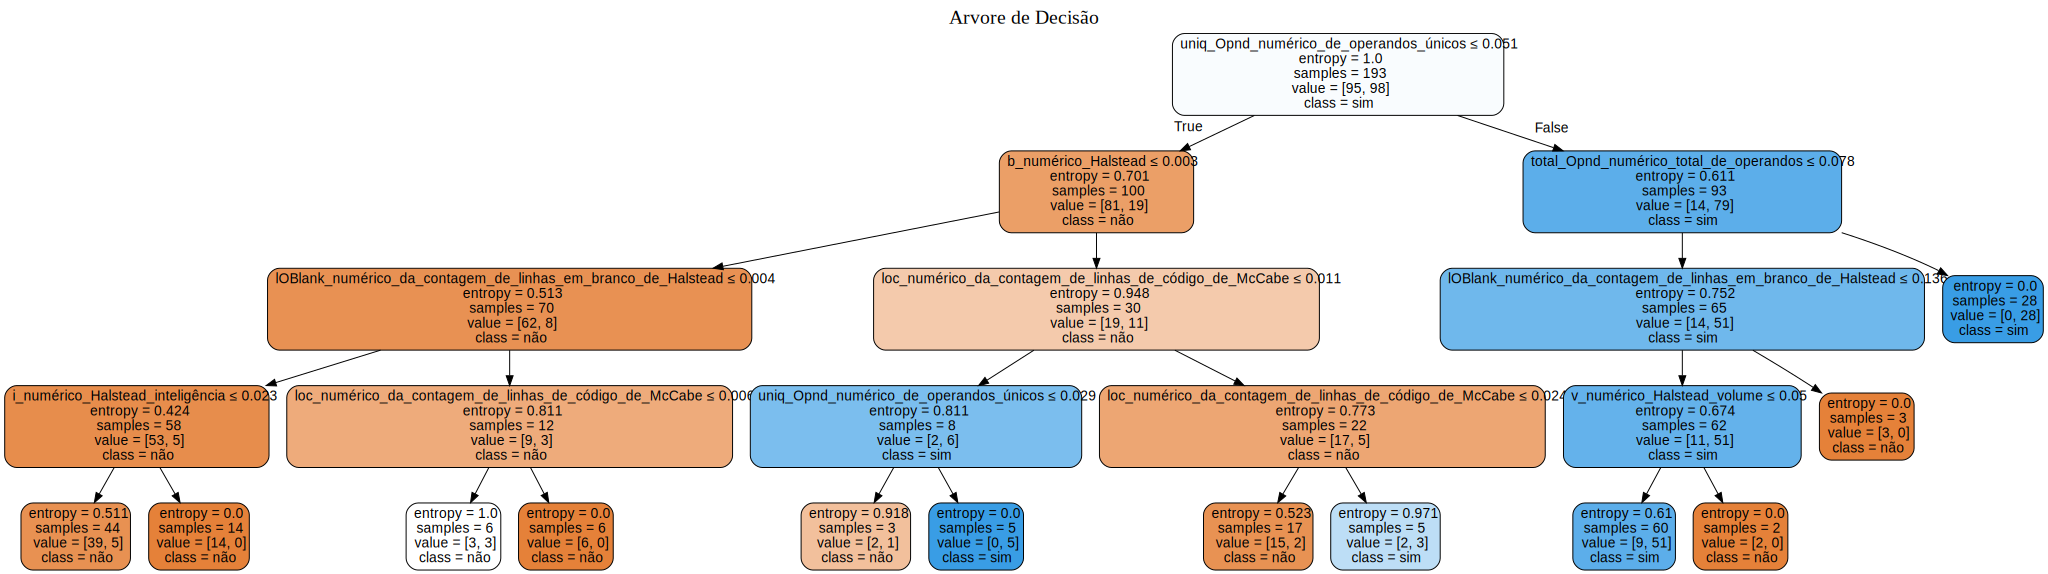

In [173]:
from sklearn.tree import export_graphviz
import graphviz

# Generate the DOT data
dot_data = export_graphviz(
    arvore,
    out_file=None,
    feature_names=colunas,
    filled=True,
    rounded=True,
    class_names=['não', 'sim'],
    special_characters=True
)

# Customize the DOT data to add a title and improve aesthetics
dot_data = dot_data.replace(
    'digraph Tree {',
    'digraph Tree {\nlabel="Arvore de Decisão"\nlabelloc="t"\nfontsize=20'
)



grafico = graphviz.Source(dot_data)
grafico